<a href="https://colab.research.google.com/github/chrimeade/UCDPA_chrismeade/blob/main/superstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Datasets/SampleSuperstore.csv"
sales_df = pd.read_csv(path)

In [6]:
sales_df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

Checking for all unique entries in each column to see if any can be removed.

In [ ]:
sales_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

As country only has one type, United States, and there is a large number of unique values for postal code, i will delete both of these columns as the information is not required


In [ ]:
sales_df.drop(['Country', 'Postal Code'], inplace=True, axis=1)

Confirm columns removal

In [ ]:
print(sales_df.columns)

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
sales_df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [ ]:
sales_df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

visuilising sales for each state as there are too many individual cities to show on a chart

In [ ]:
import matplotlib.pyplot as plt

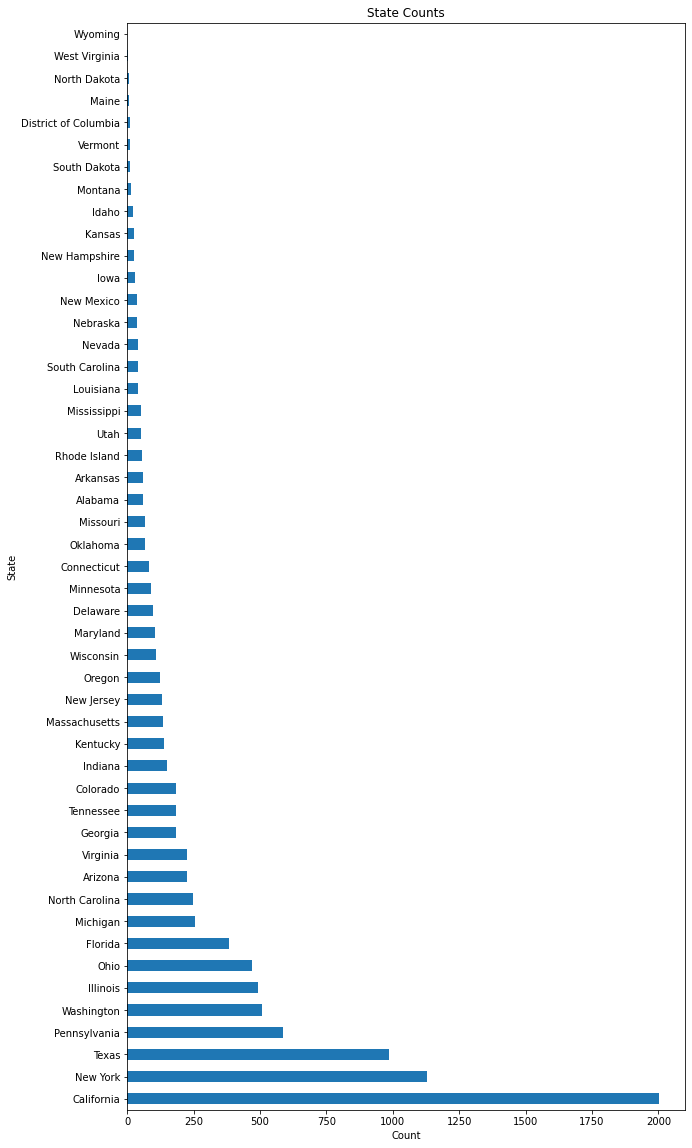

In [ ]:
state_count.plot(kind='barh', figsize=(10, 20))

plt.title('State Counts')
plt.xlabel('Count')
plt.ylabel('State')

plt.show()

detail on profit column to see range in profit of each sale

Creating a dictionary which uses each state as the key and the total sales for each state as the value:

In [ ]:
state_sales_dict = {}
for state in sales_df['State'].unique():
    state_sales_dict[state] = sales_df.loc[sales_df['State'] == state, 'Sales'].sum()
print(state_sales_dict)

{'Kentucky': 36591.75, 'California': 457687.6315, 'Florida': 89473.708, 'North Carolina': 55603.164000000004, 'Washington': 138641.27, 'Texas': 170188.0458, 'Wisconsin': 32114.61, 'Utah': 11220.055999999999, 'Nebraska': 7464.93, 'Pennsylvania': 116511.914, 'Illinois': 80166.101, 'Minnesota': 29863.15, 'Michigan': 76269.614, 'Delaware': 27451.069, 'Indiana': 53555.359999999986, 'New York': 310876.27099999995, 'Arizona': 35282.001000000004, 'Virginia': 70636.72, 'Tennessee': 30661.873, 'Alabama': 19510.639999999996, 'South Carolina': 8481.710000000001, 'Oregon': 17431.149999999998, 'Colorado': 32108.118000000002, 'Iowa': 4579.759999999999, 'Ohio': 78258.136, 'Missouri': 22205.149999999998, 'Oklahoma': 19683.390000000003, 'New Mexico': 4783.522, 'Louisiana': 9217.03, 'Connecticut': 13384.357, 'New Jersey': 35764.312, 'Massachusetts': 28634.434000000005, 'Georgia': 49095.84, 'Nevada': 16729.102000000003, 'Rhode Island': 22627.956, 'Mississippi': 10771.340000000002, 'Arkansas': 11678.130000

Amended code where dictionary results are printed on each individual line:

In [ ]:
state_sales_dict = {}
for state in sales_df['State'].unique():
    state_sales_dict[state] = sales_df.loc[sales_df['State'] == state, 'Sales'].sum()
for key, value in state_sales_dict.items():
    print(key + ": " + str(round(value, 2)))

Kentucky: 36591.75
California: 457687.63
Florida: 89473.71
North Carolina: 55603.16
Washington: 138641.27
Texas: 170188.05
Wisconsin: 32114.61
Utah: 11220.06
Nebraska: 7464.93
Pennsylvania: 116511.91
Illinois: 80166.1
Minnesota: 29863.15
Michigan: 76269.61
Delaware: 27451.07
Indiana: 53555.36
New York: 310876.27
Arizona: 35282.0
Virginia: 70636.72
Tennessee: 30661.87
Alabama: 19510.64
South Carolina: 8481.71
Oregon: 17431.15
Colorado: 32108.12
Iowa: 4579.76
Ohio: 78258.14
Missouri: 22205.15
Oklahoma: 19683.39
New Mexico: 4783.52
Louisiana: 9217.03
Connecticut: 13384.36
New Jersey: 35764.31
Massachusetts: 28634.43
Georgia: 49095.84
Nevada: 16729.1
Rhode Island: 22627.96
Mississippi: 10771.34
Arkansas: 11678.13
Montana: 5589.35
New Hampshire: 7292.52
Maryland: 23705.52
District of Columbia: 2865.02
Kansas: 2914.31
Vermont: 8929.37
Maine: 1270.53
South Dakota: 1315.56
Idaho: 4382.49
North Dakota: 919.91
Wyoming: 1603.14
West Virginia: 1209.82


In [ ]:
profit_info = sales_df['Profit'].describe()
print(profit_info)

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64


I would like to define all sales as "profitable" or "loss leading" as there are quite high variations between the two

In [ ]:
sales_df.sort_values('Profit', ascending=False)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904


In [ ]:
state_group = sales_df.groupby("State")
state_average_profit_sales = state_group["Profit", "Sales"].mean()
print(state_average_profit_sales)

                          Profit        Sales
State                                        
Alabama                94.865989   319.846557
Arizona               -15.303235   157.508933
Arkansas               66.811452   194.635500
California             38.171608   228.729451
Colorado              -35.867351   176.418231
Connecticut            42.823071   163.223866
Delaware              103.930988   285.948635
District of Columbia  105.958930   286.502000
Florida                -8.875461   233.612815
Georgia                88.315453   266.825217
Idaho                  39.367767   208.689810
Illinois              -25.625787   162.939230
Indiana               123.375411   359.431946
Iowa                   39.460397   152.658667
Kansas                 34.851813   121.429583
Kentucky               80.573357   263.250000
Louisiana              52.288150   219.453095
Maine                  56.810775   158.816250
Maryland               66.963608   225.766886
Massachusetts          50.262975  

<ipython-input-51-16beb9c70969>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_average_profit_sales = state_group["Profit", "Sales"].mean()


In [ ]:
state_profit_sum = state_group["Profit", "Sales"].sum().sort_values(by="Profit", ascending=False)
print(state_profit_sum)

                          Profit        Sales
State                                        
California            76381.3871  457687.6315
New York              74038.5486  310876.2710
Washington            33402.6517  138641.2700
Michigan              24463.1876   76269.6140
Virginia              18597.9504   70636.7200
Indiana               18382.9363   53555.3600
Georgia               16250.0433   49095.8400
Kentucky              11199.6966   36591.7500
Minnesota             10823.1874   29863.1500
Delaware               9977.3748   27451.0690
New Jersey             9772.9138   35764.3120
Wisconsin              8401.8004   32114.6100
Rhode Island           7285.6293   22627.9560
Maryland               7031.1788   23705.5230
Massachusetts          6785.5016   28634.4340
Missouri               6436.2105   22205.1500
Alabama                5786.8253   19510.6400
Oklahoma               4853.9560   19683.3900
Arkansas               4008.6871   11678.1300
Connecticut            3511.4918  

<ipython-input-29-4f65f7c0c209>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_profit_sum = state_group["Profit", "Sales"].sum().sort_values(by="Profit", ascending=False)


<ipython-input-63-86160721f240>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(state_profit_sum.index,rotation=45,ha='right')


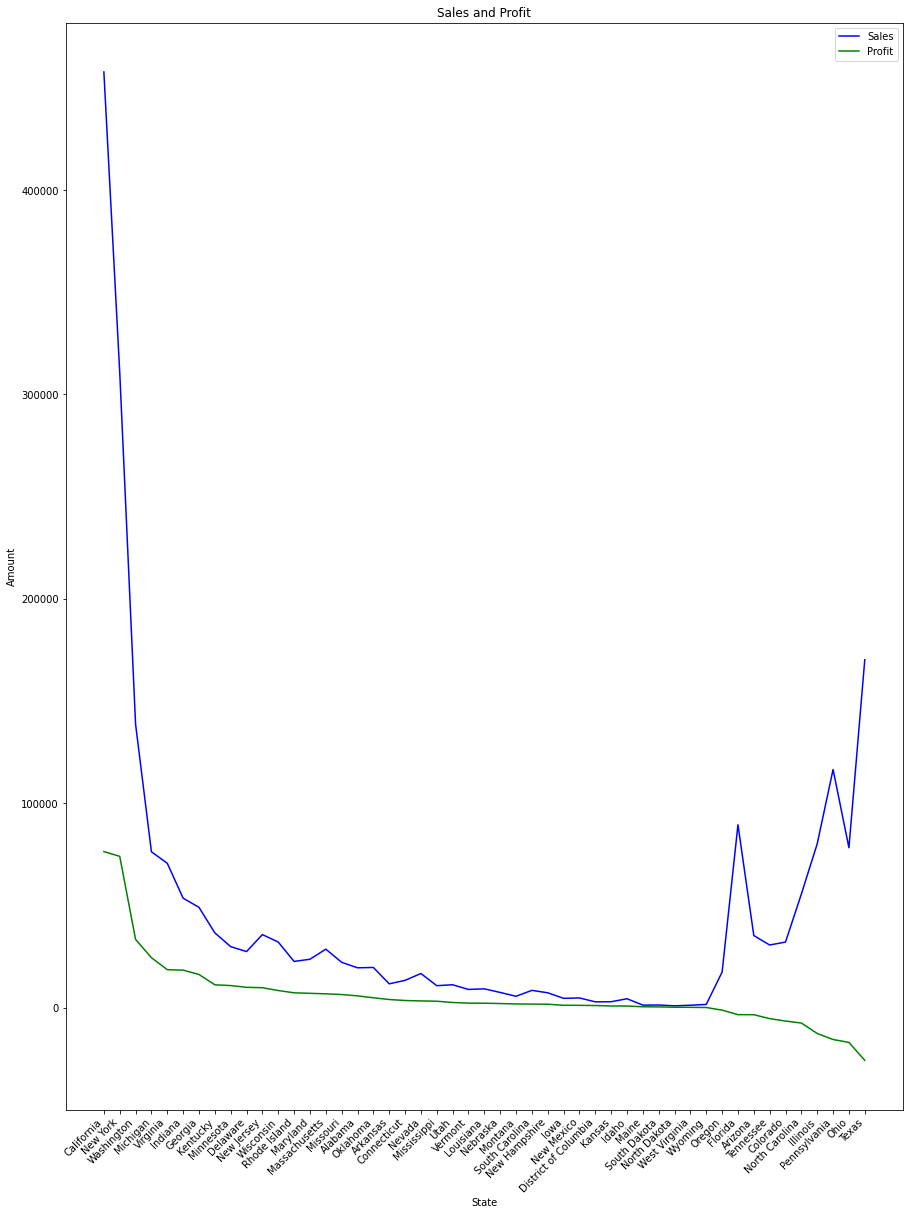

In [ ]:
fig, chart = plt.subplots(figsize=(15,20))
chart.plot(state_profit_sum.index, state_profit_sum['Sales'], color='blue', label='Sales')
chart.plot(state_profit_sum.index, state_profit_sum['Profit'], color='green', label='Profit')

chart.set_xlabel('State')
chart.set_ylabel('Amount')
chart.set_title('Sales and Profit')
chart.legend()

chart.set_xticklabels(state_profit_sum.index,rotation=45,ha='right')

plt.show()


using groupby to create a list of the top 5 categories by total sales:

---



In [ ]:
sales_by_category = sales_df.groupby('Sub-Category')['Sales'].sum()
top_categories_list = sales_by_category.nlargest(5).index.tolist()
print(top_categories_list)

['Phones', 'Chairs', 'Storage', 'Tables', 'Binders']


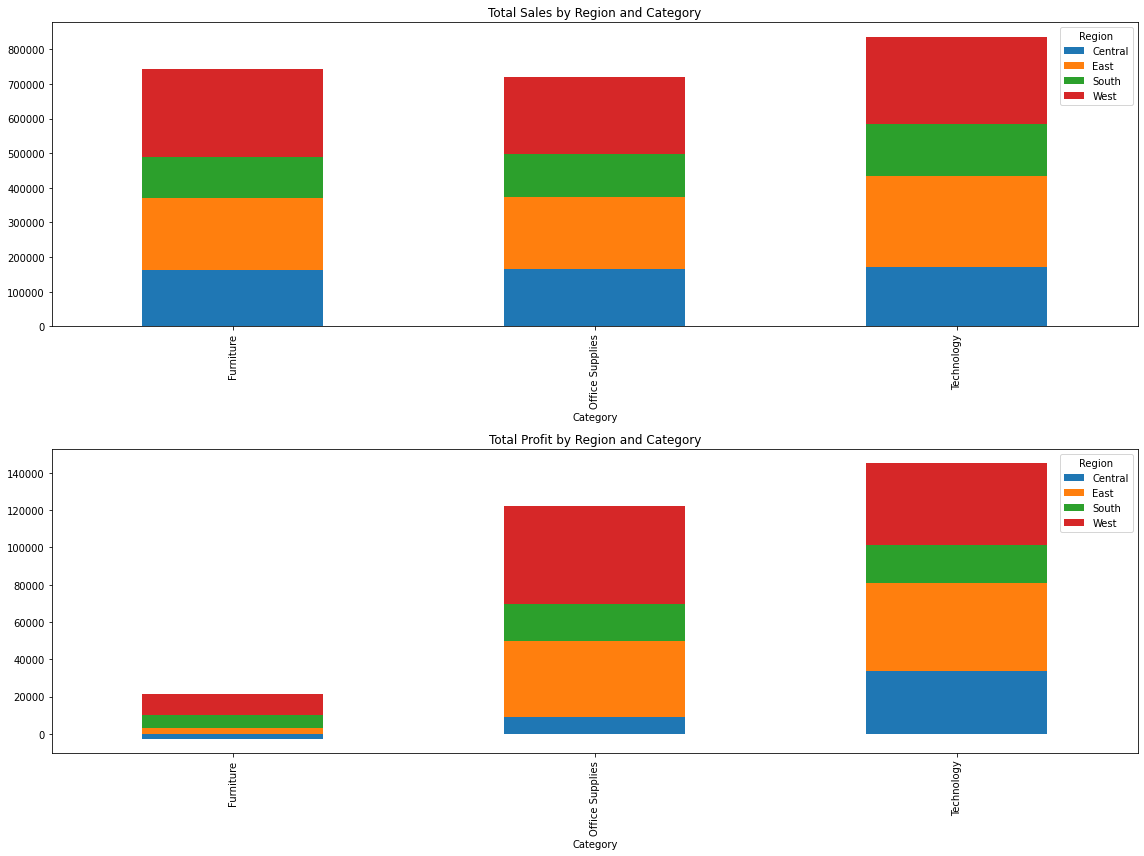

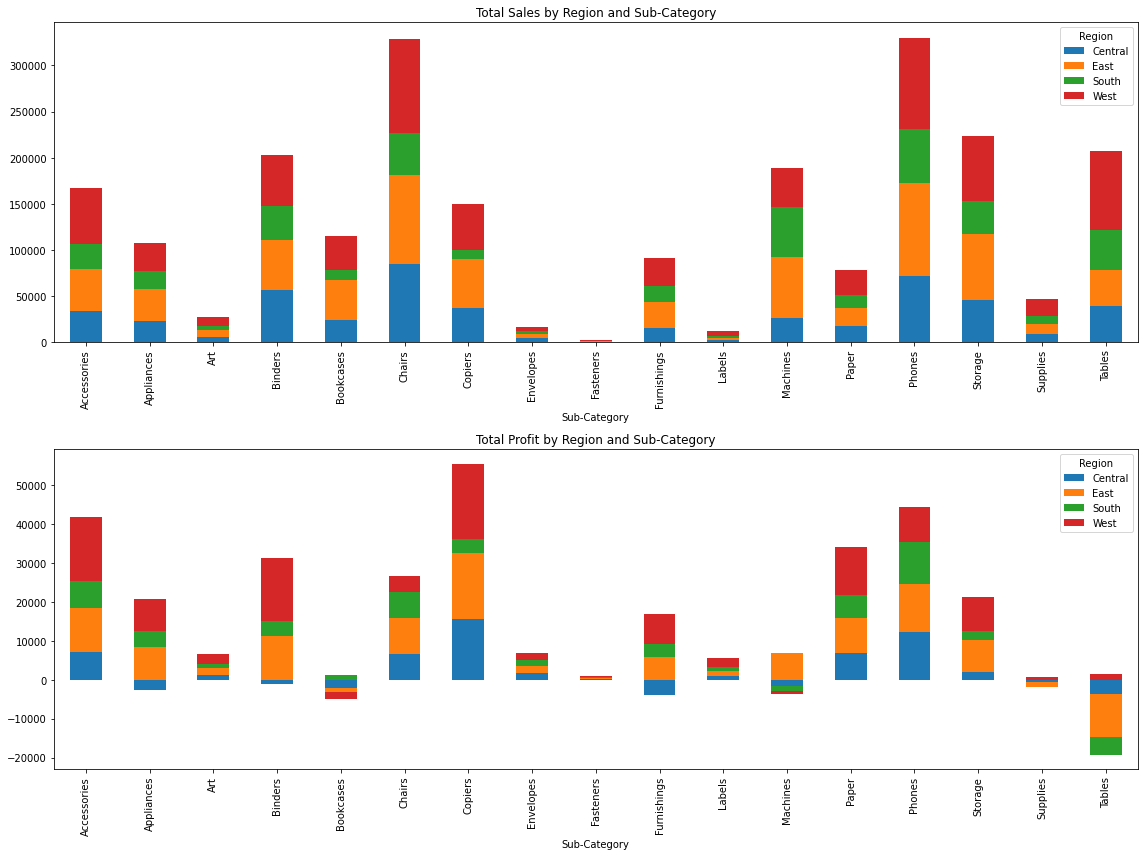

In [ ]:
import matplotlib.pyplot as plt

category_region_sales = sales_df.groupby(['Category', 'Region'])['Sales'].sum()
category_region_profit = sales_df.groupby(['Category', 'Region'])['Profit'].sum()

subcat_region_sales = sales_df.groupby(['Sub-Category', 'Region'])['Sales'].sum()
subcat_region_profit = sales_df.groupby(['Sub-Category', 'Region'])['Profit'].sum()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
category_region_sales.unstack().plot(kind='bar', stacked=True, ax=ax[0], title='Total Sales by Region and Category')
category_region_profit.unstack().plot(kind='bar', stacked=True, ax=ax[1], title='Total Profit by Region and Category')
plt.tight_layout()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
subcat_region_sales.unstack().plot(kind='bar', stacked=True, ax=ax[0], title='Total Sales by Region and Sub-Category')
subcat_region_profit.unstack().plot(kind='bar', stacked=True, ax=ax[1], title='Total Profit by Region and Sub-Category')
plt.tight_layout()

plt.show()


In [ ]:
sales_df.groupby(['Category', 'Sub-Category'])['Quantity'].sum()

Category         Sub-Category
Furniture        Bookcases        868
                 Chairs          2356
                 Furnishings     3563
                 Tables          1241
Office Supplies  Appliances      1729
                 Art             3000
                 Binders         5974
                 Envelopes        906
                 Fasteners        914
                 Labels          1400
                 Paper           5178
                 Storage         3158
                 Supplies         647
Technology       Accessories     2976
                 Copiers          234
                 Machines         440
                 Phones          3289
Name: Quantity, dtype: int64

In [ ]:
def category_data(df, category):
    category_df = df[df['Category'] == category]
    results = category_df.groupby('Sub-Category').agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'})
    return results

furniture_sales = category_data(sales_df, 'Furniture')
print(furniture_sales)
print("__________")

office_supplies_sales = category_data(sales_df, 'Office Supplies')
print(office_supplies_sales)
print("__________")

technology_sales = category_data(sales_df, 'Technology')
print(technology_sales)

                    Sales  Quantity      Profit
Sub-Category                                   
Bookcases     114879.9963       868  -3472.5560
Chairs        328449.1030      2356  26590.1663
Furnishings    91705.1640      3563  13059.1436
Tables        206965.5320      1241 -17725.4811
__________
                   Sales  Quantity      Profit
Sub-Category                                  
Appliances    107532.161      1729  18138.0054
Art            27118.792      3000   6527.7870
Binders       203412.733      5974  30221.7633
Envelopes      16476.402       906   6964.1767
Fasteners       3024.280       914    949.5182
Labels         12486.312      1400   5546.2540
Paper          78479.206      5178  34053.5693
Storage       223843.608      3158  21278.8264
Supplies       46673.538       647  -1189.0995
__________
                   Sales  Quantity      Profit
Sub-Category                                  
Accessories   167380.318      2976  41936.6357
Copiers       149528.030       2

In [ ]:
def modify_category_data(df, category):
    category_df = df[df['Category'] == category]
    modified_results = category_df.groupby(['State', 'Sub-Category']).agg({'Sales': 'sum', 'Quantity': 'sum', 'Profit': 'sum'})
    return modified_results
modified_results = modify_category_data(sales_df, 'Technology')
print(modified_results)


                             Sales  Quantity     Profit
State      Sub-Category                                
Alabama    Accessories    2322.830        24   816.4346
           Copiers         899.970         3   314.9895
           Machines       3040.000         8  1459.2000
           Phones         2706.280        18   707.1788
Arizona    Accessories    3396.160        85   224.7694
...                            ...       ...        ...
Washington Copiers       20249.830        17  9442.4242
           Machines       6066.152        21   615.0637
           Phones         9101.568       116   698.5820
Wisconsin  Accessories    4795.480        64  1501.1720
           Phones         4002.680        40  1095.8977

[136 rows x 3 columns]


In [ ]:
modified_results.to_csv('sub_category_results.csv')


In [ ]:
sales_df[['Quantity']].describe()

,Quantity
count,9994.000000
mean,3.789574
std,2.225110
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


In [ ]:
def quantity_segment (quantity):
    if quantity == 1:
        return 'Single Item'
    elif quantity <= 3:
        return 'Small Order'
    elif quantity <= 5:
        return 'Medium Order'
    else:
        return 'Large Order'
        
sales_df['Quantity Segment'] = sales_df['Quantity'].apply(quantity_segment)


In [ ]:
sales_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Quantity Segment
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Small Order
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Small Order
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Small Order
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Medium Order
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Small Order


In [49]:
avg_quantity_by_subcat = sales_df.groupby('Sub-Category')['Quantity'].mean()
sns.scatterplot(x='Sub-Category', y='Quantity', data=avg_quantity_by_subcat)
plt.xticks(rotation=45, ha='right')
plt.show()

ValueError: ignored

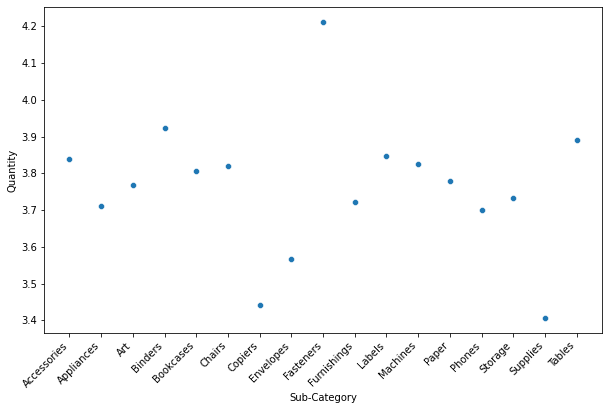

In [ ]:
plt.figure(figsize=(10, 6))
avg_quantity_by_subcat = sales_df.groupby('Sub-Category')['Quantity'].mean().reset_index()
sns.scatterplot(x='Sub-Category', y='Quantity', data=avg_quantity_by_subcat)
plt.xticks(rotation=45, ha='right')
plt.show()

for loop made to provide more information from the different customer segments

In [38]:
segments = sales_df['Segment'].unique()

for segment in segments:
    segment_df = sales_df[sales_df['Segment'] == segment]
    segment_sales = round(segment_df['Sales'].sum(), 2)
    segment_profit = round(segment_df['Profit'].sum(), 2)
    avg_discount = round(segment_df['Discount'].mean() * 100, 2)
    print("Sales summary for {} segment:".format(segment))
    print("Total sales: ${}".format(segment_sales))
    print("Total profit: ${}".format(segment_profit))
    print("Average discount: {}%".format(avg_discount))

Sales summary for Consumer segment:
Total sales: $1161401.34
Total profit: $134119.21
Average discount: 15.81%
Sales summary for Corporate segment:
Total sales: $706146.37
Total profit: $91979.13
Average discount: 15.82%
Sales summary for Home Office segment:
Total sales: $429653.15
Total profit: $60298.68
Average discount: 14.71%


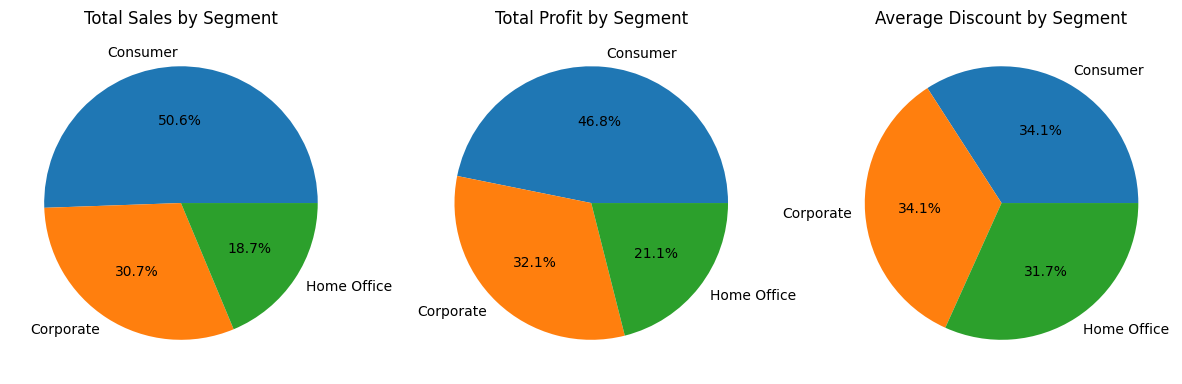

In [39]:
total_sales = [round(sales_df[sales_df['Segment'] == segment]['Sales'].sum(), 2) for segment in segments]
total_profit = [round(sales_df[sales_df['Segment'] == segment]['Profit'].sum(), 2) for segment in segments]
avg_discount = [round(sales_df[sales_df['Segment'] == segment]['Discount'].mean() * 100, 2) for segment in segments]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].pie(total_sales, labels=segments, autopct='%1.1f%%')
ax[0].set_title('Total Sales by Segment')
ax[1].pie(total_profit, labels=segments, autopct='%1.1f%%')
ax[1].set_title('Total Profit by Segment')
ax[2].pie(avg_discount, labels=segments, autopct='%1.1f%%')
ax[2].set_title('Average Discount by Segment')
plt.show()

In [43]:
home_office_high_profit_df = sales_df[(sales_df['Segment'] == 'Home Office') & (sales_df['Profit'] > 500)]

In [45]:
print(home_office_high_profit_df.head())

          Ship Mode      Segment        Country           City      State  \
244    Second Class  Home Office  United States      Lakeville  Minnesota   
318  Standard Class  Home Office  United States  New York City   New York   
353     First Class  Home Office  United States  New York City   New York   
515  Standard Class  Home Office  United States    Great Falls    Montana   
910  Standard Class  Home Office  United States        Jackson   Michigan   

     Postal Code   Region         Category Sub-Category     Sales  Quantity  \
244        55044  Central        Furniture       Chairs  2001.860         7   
318        10024     East       Technology     Machines  3991.980         2   
353        10009     East  Office Supplies      Binders  4355.168         4   
515        59405     West       Technology      Copiers  2999.950         5   
910        49201  Central       Technology  Accessories  1928.780         7   

     Discount     Profit  
244       0.0   580.5394  
318     

In [46]:
home_off_not_tech_df = home_office_high_profit_df[home_office_high_profit_df["Category"] != "Technology"]
print(home_off_not_tech_df.sort_values(by="Profit", ascending=False))


           Ship Mode      Segment        Country             City  \
7683     First Class  Home Office  United States          Midland   
7818    Second Class  Home Office  United States  North Las Vegas   
353      First Class  Home Office  United States    New York City   
3566  Standard Class  Home Office  United States     Independence   
8890    Second Class  Home Office  United States         Columbia   
7474  Standard Class  Home Office  United States        Henderson   
8760  Standard Class  Home Office  United States          Atlanta   
3986  Standard Class  Home Office  United States       Plainfield   
6467  Standard Class  Home Office  United States       Providence   
244     Second Class  Home Office  United States        Lakeville   
9056     First Class  Home Office  United States    New York City   

             State  Postal Code   Region         Category Sub-Category  \
7683      Michigan        48640  Central  Office Supplies      Binders   
7818        Nevada     

In [47]:
profit_per_item = home_off_not_tech_df.groupby(['Sub-Category']).agg({'Quantity': 'sum', 'Profit': 'sum'})
profit_per_item['Profit_Per_Sale'] = profit_per_item['Profit'] / profit_per_item['Quantity']
profit_per_item = profit_per_item.sort_values(by=['Profit_Per_Sale'], ascending=False)
print(profit_per_item)


              Quantity     Profit  Profit_Per_Sale
Sub-Category                                      
Binders             14  6359.1121       454.222293
Storage              9  1204.2064       133.800711
Appliances           7   751.7601       107.394300
Chairs              27  1880.3374        69.642126


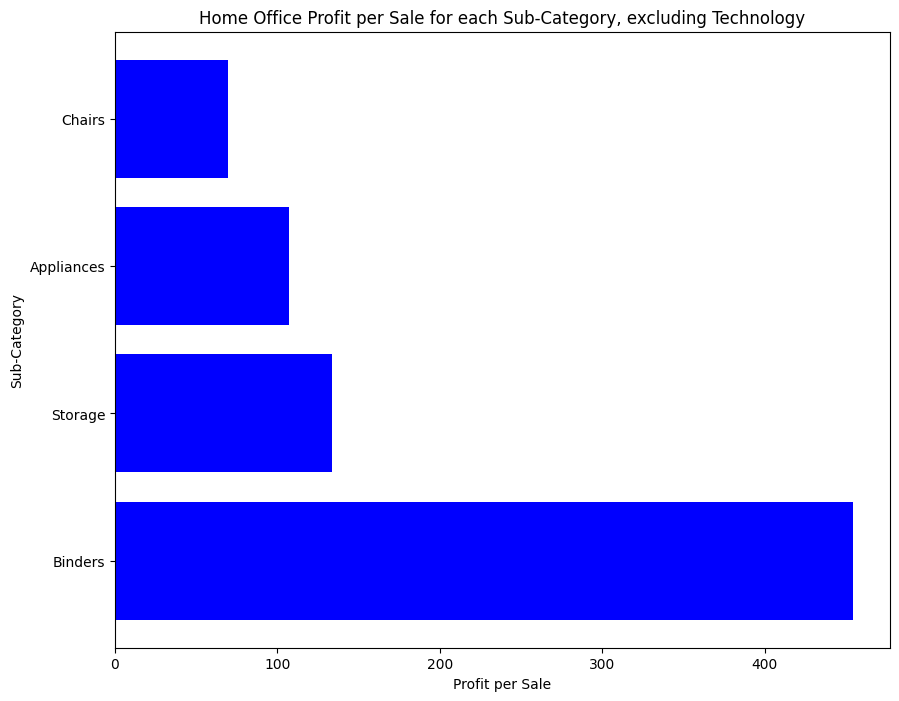

In [48]:
plt.figure(figsize=(10,8))
plt.barh(profit_per_item.index, profit_per_item['Profit_Per_Sale'], color='blue')

plt.xlabel('Profit per Sale')
plt.ylabel('Sub-Category')
plt.title('Home Office Profit per Sale for each Sub-Category, excluding Technology')
plt.show()


In [8]:
path = "/content/drive/MyDrive/Datasets/uscities.xlsx"
cities_df = pd.read_excel(path)

In [9]:
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440


In [10]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30844 entries, 0 to 30843
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          30844 non-null  object 
 1   city_ascii    30844 non-null  object 
 2   state_id      30844 non-null  object 
 3   state_name    30844 non-null  object 
 4   county_fips   30844 non-null  int64  
 5   county_name   30844 non-null  object 
 6   lat           30844 non-null  float64
 7   lng           30844 non-null  float64
 8   population    30844 non-null  int64  
 9   density       30844 non-null  float64
 10  source        30844 non-null  object 
 11  military      30844 non-null  bool   
 12  incorporated  30844 non-null  bool   
 13  timezone      30844 non-null  object 
 14  ranking       30844 non-null  int64  
 15  zips          30842 non-null  object 
 16  id            30844 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.6+ MB


Rename of the 'city' column from being lower case to capitalised so it can match the same column in the sales_df

In [11]:
cities_df = cities_df.rename(columns={'city': 'City', 'state_name': 'State', 'population': 'Population'})

merging of two dataframes

In [12]:
merged_df = sales_df.merge(cities_df[['City', 'State', 'Population']], on=['City', 'State'], how='left')

In [13]:
merged_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Population
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,28201.0
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,28201.0
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,12121244.0
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,182247.0
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,182247.0


In [14]:
merged_df = merged_df.reindex(columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Population', 'Postal Code',	'Region',	'Category',	'Sub-Category',	'Sales',	'Quantity',	'Discount',	'Profit',	'City_State'])


In [15]:
merged_df.head()

,Ship Mode,Segment,Country,City,State,Population,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,City_State
0,Second Class,Consumer,United States,Henderson,Kentucky,28201.0,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,NaN
1,Second Class,Consumer,United States,Henderson,Kentucky,28201.0,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,NaN
2,Second Class,Corporate,United States,Los Angeles,California,12121244.0,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,NaN
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,182247.0,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,NaN
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,182247.0,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,NaN


find any null entries

In [16]:
null_populations = merged_df['Population'].isnull().sum()
print(f"Number of null Populations: {null_populations}")


Number of null Populations: 1085


In [17]:
merged_df = merged_df.dropna(subset=['Population'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8909 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     8909 non-null   object 
 1   Segment       8909 non-null   object 
 2   Country       8909 non-null   object 
 3   City          8909 non-null   object 
 4   State         8909 non-null   object 
 5   Population    8909 non-null   float64
 6   Postal Code   8909 non-null   int64  
 7   Region        8909 non-null   object 
 8   Category      8909 non-null   object 
 9   Sub-Category  8909 non-null   object 
 10  Sales         8909 non-null   float64
 11  Quantity      8909 non-null   int64  
 12  Discount      8909 non-null   float64
 13  Profit        8909 non-null   float64
 14  City_State    0 non-null      float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.1+ MB


In [26]:
import pandas as pd

city_sales_count = merged_df.groupby(['City', 'State'])['Population'].count().reset_index()
city_sales_count.columns = ['City', 'State', 'Sales_Count']

city_population = merged_df.groupby(['City', 'State'])['Population'].mean().reset_index()
city_population.columns = ['City', 'State', 'Population']

result = pd.merge(city_sales_count, city_population, on=['City', 'State'])
result['Sales_Per_Capita'] = result['Sales_Count'] / result['Population']

state_sales = result.groupby('State')[['Sales_Count', 'Population']].sum().reset_index()
state_sales['Sales_Per_Capita'] = state_sales['Sales_Count'] / state_sales['Population']

print(state_sales.sort_values('Sales_Per_Capita', ascending=False))


                   State  Sales_Count  Population  Sales_Per_Capita
6               Delaware           96    228250.0          0.000421
17                 Maine            8     68535.0          0.000117
19         Massachusetts          114    993704.0          0.000115
15              Kentucky          139   1342366.0          0.000104
43               Vermont           11    115682.0          0.000095
45            Washington          506   5459609.0          0.000093
23              Missouri           56    656822.0          0.000085
28            New Jersey           88   1090807.0          0.000081
36          Pennsylvania          587   7375308.0          0.000080
30              New York          202   2568373.0          0.000079
22           Mississippi           53    697627.0          0.000076
27         New Hampshire           27    369408.0          0.000073
33                  Ohio          469   7041288.0          0.000067
16             Louisiana           42    651098.

In [34]:
import plotly.express as px

state_abbr = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state_sales['state_abbr'] = state_sales['State'].map(state_abbr)

fig = px.choropleth(state_sales, 
                    locations='state_abbr', 
                    locationmode='USA-states', 
                    color='Sales_Per_Capita',
                    scope='usa',
                    range_color=[0.000002, 0.000421],
                    color_continuous_scale='Picnic',
                    title='Sales per Capita by State')
fig.show()
